# 데이터사이언스 (0010085001)

## Exercise 6: Data Understanding (2)

In this excercise, we will cover the exercise on the data understanding.

Especially, we will study the mean, median, mode, which are the distribution for the central value. Next, we will learn the sample variance, sample standard deviation, skewness, and kurtosis, which determine the degree of spread.

### 1. 중심위치확인

#### 예제: 중심위치

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Step 1: 데이터프레임의 구조

# apartments.csv 다운로드
# gdrive link: https://drive.google.com/file/d/1biRQigoeInynB6JtS81BOLobgInAcXb-/view?usp=share_link

In [49]:
# csv 파일 읽기
df = pd.read_csv('apartments.csv')
df.head()

,Unnamed: 0,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
0,0,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,50.64,201902,1~10,162000,2,1982,개포로
1,1,서울특별시 강남구 개포동,187,187,0,개포주공 5단지,74.25,201902,11~20,153500,1,1983,삼성로4길
2,2,서울특별시 강남구 개포동,185,185,0,개포주공 6단지,60.13,201902,11~20,130000,5,1983,개포로
3,3,서울특별시 강남구 개포동,185,185,0,개포주공 7단지,60.76,201902,11~20,130500,9,1983,개포로
4,4,서울특별시 강남구 개포동,185,185,0,개포주공 7단지,53.46,201902,21~28,114000,14,1983,개포로


In [50]:
# 필요없는 열 삭제
df = df.drop('Unnamed: 0', axis=1)

In [51]:
# 데이터 확인
df.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
0,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,50.64,201902,1~10,162000,2,1982,개포로
1,서울특별시 강남구 개포동,187,187,0,개포주공 5단지,74.25,201902,11~20,153500,1,1983,삼성로4길
2,서울특별시 강남구 개포동,185,185,0,개포주공 6단지,60.13,201902,11~20,130000,5,1983,개포로
3,서울특별시 강남구 개포동,185,185,0,개포주공 7단지,60.76,201902,11~20,130500,9,1983,개포로
4,서울특별시 강남구 개포동,185,185,0,개포주공 7단지,53.46,201902,21~28,114000,14,1983,개포로


In [52]:
# 데이터의 형상 확인
df.shape

(1164, 12)

In [53]:
# 각 열의 정보와 메모리 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 0 to 1163
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       1164 non-null   object 
 1   번지        1164 non-null   object 
 2   본번        1164 non-null   int64  
 3   부번        1164 non-null   int64  
 4   단지명       1164 non-null   object 
 5   전용면적(㎡)   1164 non-null   float64
 6   계약년월      1164 non-null   int64  
 7   계약일       1164 non-null   object 
 8   거래금액(만원)  1164 non-null   int64  
 9   층         1164 non-null   int64  
 10  건축년도      1164 non-null   int64  
 11  도로명       1164 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 109.2+ KB


In [54]:
# Step 2: 기술통계
# '계약일' 열의 개수를 확인
df['계약일'].count() # df.shape[0]

1164

In [55]:
# 특정 열 내의 유일한 값 확인
pd.unique(df['계약일'])

array(['1~10', '11~20', '21~28', '21~31'], dtype=object)

In [56]:
# 특정 열에서 각 값이 나온 횟수 확인
df['계약일'].value_counts()

11~20    463
21~28    340
1~10     258
21~31    103
Name: 계약일, dtype: int64

In [62]:
# 범주형 데이터의 통계를 확인
df[['계약일']].describe()

60000    26
35000    15
31000    13
40000    13
46000    12
         ..
82500     1
36600     1
51800     1
77500     1
54400     1
Name: 거래금액(만원), Length: 495, dtype: int64

In [58]:
# '거래금액(만원)' 열의 개수, 평균, 표준편차, 범위와 사분위수 확인
df[['거래금액(만원)']].describe()

,거래금액(만원)
count,1164.000000
mean,58814.713058
std,46207.115723
min,7700.000000
25%,32000.000000
50%,45850.000000
75%,69000.000000
max,630000.000000


In [59]:
# Step 3: 평균, 중앙값, 최빈값 계산
# 평균값
df[['거래금액(만원)']].mean()

거래금액(만원)    58814.713058
dtype: float64

In [60]:
# 중앙값
df[['거래금액(만원)']].median()

거래금액(만원)    45850.0
dtype: float64

In [61]:
# 최빈값: 가장 많이 나타나는 값의 개수
df[['거래금액(만원)']].mode()

,거래금액(만원)
0,60000


In [63]:
# 최빈값의 사분위수 확인
x = df['거래금액(만원)']

bins = [.25, .5, .75]

m = df['거래금액(만원)'].mode()[0]

In [64]:
# 넘파이 모듈의 histogram 함수를 사용하여 최빈값과 구간을 조회
# 거래금액 열에 대한 히스토그램
ns, _ = np.histogram(x, bins=bins)

# def sum(a, b):
#    return a + b, a, b

# c, _, _ = sum(4, 5)

In [65]:
# 가장 빈도가 높은 인덱스 출력
m_bin = np.argmax(ns)

print("최빈값 = {}, 최빈구간 = {}~{}".format(
    m, bins[m_bin], bins[m_bin+1]))

최빈값 = 60000, 최빈구간 = 0.25~0.5


In [66]:
# Step 4: 평균, 중앙값, 최빈값을 그래프로 표시하기
import matplotlib.pyplot as plt
# import matplotlib as m_bin
import seaborn as sns

%matplotlib inline

In [67]:
# 데이터프레임에서 거래금액 열을 변수 x에 할당
# 평균, 중앙값, 최빈값 계산
x = df['거래금액(만원)']

sample_mean = int(x.mean()) # 
sample_median = x.median() # 
sample_mode = x.mode()[0] # 
print(sample_mean, sample_median, sample_mode)

58814 45850.0 60000


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50521 (\N{HANGUL SYLLABLE ANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/

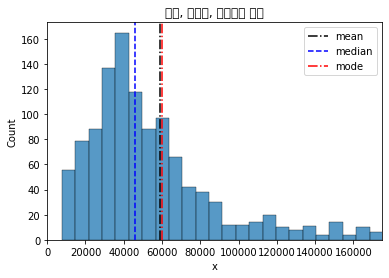

In [70]:
# 그래프 그리기
sns.histplot(x)

plt.axvline(sample_mean,   c='k', ls='-.', label='mean')
plt.axvline(sample_median, c='b', ls='--', label='median')
plt.axvline(sample_mode,   c='r', ls='-.', label='mode')

plt.title('평균, 중앙값, 최빈값의 차이')
plt.xlabel('x')
plt.legend() # plot labeling

plt.xlim(0, 175000)
plt.show()

### 2. 퍼진 정도 확인

#### 예제: 퍼진 정도 알아보기

In [71]:
# Step 1: 분산
df[['거래금액(만원)']].var()

거래금액(만원)    2.135098e+09
dtype: float64

In [72]:
# Step 2: 표준편차
df[['거래금액(만원)']].std()

거래금액(만원)    46207.115723
dtype: float64

In [74]:
# Step 3: 범위
print(df[['거래금액(만원)']].min())
print(df[['거래금액(만원)']].max())

거래금액(만원)    7700
dtype: int64
거래금액(만원)    630000
dtype: int64


In [75]:
# 최소값 확인
# 작은 거래 금액을 조회
df.nsmallest(3, ['거래금액(만원)'])

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
312,서울특별시 구로구 오류동,34-13,34,13,썬앤빌,14.064,201902,1~10,7700,7,2014,경인로19가길
1120,서울특별시 중랑구 망우동,506-8,506,8,EG Soul Leader,13.420,201902,21~28,8900,6,2012,상봉로
265,서울특별시 구로구 구로동,797-19,797,19,(797-19),35.580,201902,21~28,9000,1,1995,디지털로27라길


In [76]:
# 큰 거래금액을 조회
df.nlargest(3, ['거래금액(만원)'])

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
1007,서울특별시 용산구 한남동,810,810,0,한남더힐,240.23,201902,1~10,630000,-2,2011,독서당로
740,서울특별시 성동구 성수동1가,685-696,685,696,갤러리아 포레,195.20,201902,21~28,319000,13,2011,서울숲2길
9,서울특별시 강남구 대치동,670,670,0,동부센트레빌,161.47,201902,11~20,310000,22,2005,선릉로


In [79]:
# 사분위수
df[['거래금액(만원)']].quantile([.25, .5, .75])

,거래금액(만원)
0.25,32000.0
0.50,45850.0
0.75,69000.0


<Axes: xlabel='거래금액(만원)'>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, 

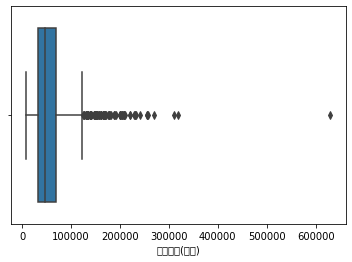

In [80]:
# 거래금액(만원) 그래프 그리기
sns.boxplot(x=df['거래금액(만원)'])

<Axes: xlabel='계약년월', ylabel='거래금액(만원)'>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  func(*args,

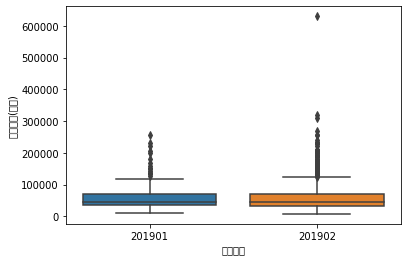

In [81]:
# 계약년월, 거래금액(만원) 그래프 그리기
sns.boxplot(x='계약년월', y='거래금액(만원)', data=df)

<Axes: xlabel='계약년월', ylabel='거래금액(만원)'>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  func(*args,

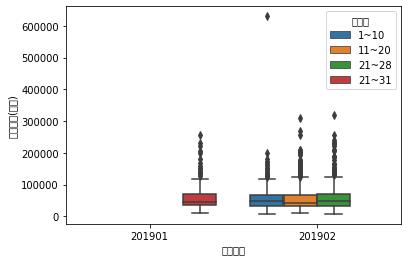

In [82]:
# 계약일로 데이터 구분하여 그리기
sns.boxplot(x='계약년월', y='거래금액(만원)', 
            hue='계약일', # 4 unique values
            data=df)

In [84]:
# Step 4: 왜도 (skewness) 와 첨도 (kurtosis)
# 왜도: 평균과의 거리의 세 제곱을 이용해 구한 특정값
#      -> 평균에서 치우친 정도
# 첨도: 평균과의 거리의 네 제곱을 이용해 구한 특정값
#      -> 중앙값에 모인 정도
print(df[['거래금액(만원)']].skew())
print(df[['거래금액(만원)']].kurtosis())

거래금액(만원)    3.323032
dtype: float64
거래금액(만원)    23.694861
dtype: float64


In [85]:
# 그래프를 통한 평균과 왜도 차이 확인
# 평균 및 왜도 계산
x = df[['거래금액(만원)']]

sample_mean = int(x.mean())
sample_skew = df[['거래금액(만원)']].skew()[0]

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50780 (\N{HANGUL SYLLABLE WAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPyt

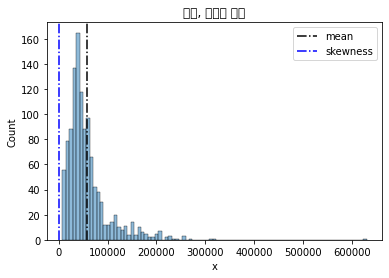

In [87]:
# 그래프 그리기
sns.histplot(x)

plt.axvline(sample_mean, c='k', ls='-.', label='mean')
plt.axvline(sample_skew, c='b', ls='-.', label='skewness')

plt.title('왜도, 평균의 차이')
plt.xlabel('x')
# plt.xlim(0, 175000)
plt.legend()
plt.show()

In [90]:
# 데이터를 로그로 변환하여 값을 정규화
# 실제 왜도가 평균보다 좌측에 있는지 확인하기 위함

import scipy as sp
x = np.log10(df['거래금액(만원)'])

sample_mean = x.mean()
sample_skew = sp.stats.skew(df[['거래금액(만원)']])[0]

In [91]:
sample_mean, sample_skew

(4.6731213951326085, 3.318747789590563)

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50780 (\N{HANGUL SYLLABLE WAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPyt

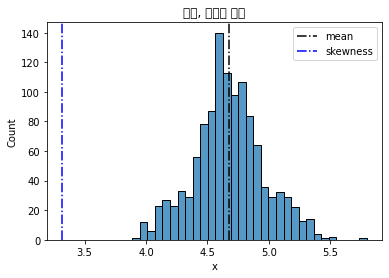

In [92]:
# 그래프 그리기
sns.histplot(x)
plt.axvline(sample_mean, c='k', ls='-.', label='mean')
plt.axvline(sample_skew, c='b', ls='-.', label='skewness')

plt.title('왜도, 평균의 차이')
plt.xlabel('x')
plt.legend()
plt.show()

### 3. 공공 데이터 분석

#### 예제: 공공 데이터 정재

In [ ]:
# 건강검진 데이터 다운로드

# gdrive link: https://drive.google.com/file/d/18GJbdztBwqWc43SdAWVstq-a0se14oL_/view?usp=share_link

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import display
from warnings import filterwarnings

%matplotlib inline

In [97]:
# Step 1: 정보읽어오기
df = pd.read_csv('./NHIS_OPEN_GJ_2014.m1.csv', encoding='cp949')
df.head()

,가입자일련번호,기준년도,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석유무,데이터 기준일자
0,2,2014,2,18,41,150,65,79,0.1,0.1,...,0.8,11,4,15,1.0,1.0,0,NaN,NaN,20161220
1,3,2014,1,12,41,170,70,95,0.8,1.0,...,0.6,138,73,112,3.0,1.0,1,0.0,1.0,20161220
2,4,2014,2,11,41,165,80,104,0.8,0.2,...,0.9,19,14,21,1.0,0.0,1,0.0,1.0,20161220
3,8,2014,2,11,41,145,55,93,0.9,0.9,...,1.2,34,16,175,1.0,1.0,0,NaN,NaN,20161220
4,9,2014,2,18,41,140,35,78,0.2,0.1,...,0.5,30,10,10,1.0,1.0,0,NaN,NaN,20161220


In [98]:
# 데이터 형상 확인
df.shape

(232549, 31)

In [99]:
# 데이터프레임 자료형 확인
df.dtypes

가입자일련번호          int64
기준년도             int64
성별코드             int64
연령대코드(5세단위)      int64
시도코드             int64
신장(5Cm단위)        int64
체중(5Kg 단위)       int64
허리둘레             int64
시력(좌)          float64
시력(우)          float64
청력(좌)          float64
청력(우)          float64
수축기혈압            int64
이완기혈압            int64
식전혈당(공복혈당)       int64
총콜레스테롤           int64
트리글리세라이드         int64
HDL콜레스테롤         int64
LDL콜레스테롤       float64
혈색소            float64
요단백            float64
혈청크레아티닌        float64
(혈청지오티)AST       int64
(혈청지오티)ALT       int64
감마지티피            int64
흡연상태           float64
음주여부           float64
구강검진 수검여부        int64
치아우식증유무        float64
치석유무           float64
데이터 기준일자         int64
dtype: object

In [100]:
# Step 2: 숫자 타입의 바이트 수 조절하기
# 자료형을 변환하여 메모리 사용량을 줄임
for i in df.columns:
  if df[i].dtype == np.int64:
    df[i] = df[i].astype(np.int16)
  if df[i].dtype == np.float64:
    df[i] = df[i].astype(np.float32)

In [101]:
df.dtypes

가입자일련번호          int16
기준년도             int16
성별코드             int16
연령대코드(5세단위)      int16
시도코드             int16
신장(5Cm단위)        int16
체중(5Kg 단위)       int16
허리둘레             int16
시력(좌)          float32
시력(우)          float32
청력(좌)          float32
청력(우)          float32
수축기혈압            int16
이완기혈압            int16
식전혈당(공복혈당)       int16
총콜레스테롤           int16
트리글리세라이드         int16
HDL콜레스테롤         int16
LDL콜레스테롤       float32
혈색소            float32
요단백            float32
혈청크레아티닌        float32
(혈청지오티)AST       int16
(혈청지오티)ALT       int16
감마지티피            int16
흡연상태           float32
음주여부           float32
구강검진 수검여부        int16
치아우식증유무        float32
치석유무           float32
데이터 기준일자         int16
dtype: object

In [103]:
# Step 3: 결측값 제거
# 데이터 프레임의 결측값 확인
df_1 = df.isna() # (22xxxx, 31)
df_1

,가입자일련번호,기준년도,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석유무,데이터 기준일자
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232544,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
232545,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
232546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
232547,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


In [105]:
## 총 결측값을 sum 메소드로 확인
df_1.sum().sum()

348148

In [106]:
# 모든 결측값을 0으로 처리
df = df.fillna(0)

In [107]:
# 결측값 존재유무 확인
d = df.isna()

In [108]:
# 총 결측값 확인
d.sum().sum()

0

In [109]:
# Step 4: 특정 열로 새로운 구조 만들기
d_ = df[['성별코드', '신장(5Cm단위)']].copy()
d_.head()

,성별코드,신장(5Cm단위)
0,2,150
1,1,170
2,2,165
3,2,145
4,2,140


In [110]:
# 계산할 열 추가
d_.loc[:,"count"] = 1

In [111]:
d_.head()

,성별코드,신장(5Cm단위),count
0,2,150,1
1,1,170,1
2,2,165,1
3,2,145,1
4,2,140,1


In [112]:
# Step 5: 피벗테이블 만들기
# 많은 양의 데이터에서 필요한 자료만을 뽑아 새롭게 표를 작성

# Reference: https://xlworks.net/excel-pivot-basic/

# 신장 column 기준으로 피벗테이블 생성
d_c = pd.pivot_table(d_,                       # 피벗할 데이터프레임
                     index=['신장(5Cm단위)'],  # 행 위치에 들어갈 열
                     columns=['성별코드'],     # 열 위치에 들어갈 열
                     values="count",           # 데이터로 사용할 열
                     aggfunc= np.sum)          # 데이터 집계함수

In [113]:
# 피벗테이블 확인
d_c

성별코드,1,2
신장(5Cm단위),,
130,NaN,3.0
135,NaN,61.0
140,4.0,433.0
145,6.0,2431.0
150,145.0,10544.0
155,1114.0,25595.0
160,6286.0,33263.0
165,19600.0,21844.0
170,35416.0,7645.0


In [114]:
# 결측값을 9으로 처리
d_c = d_c.fillna(0)

In [115]:
# 통계량 확인
d_c.describe()

성별코드,1,2
count,14.000000,14.000000
mean,9238.214286,7372.428571
std,13480.772810,11283.678020
min,0.000000,0.000000
25%,33.250000,17.500000
50%,1176.500000,867.000000
75%,16419.000000,9819.250000
max,36888.000000,33263.000000
